### Описание датасетов
 - restaurants.csv: содержит информацию о населении города(первое число) и прибыли ресторана в этом городе.
 - houses.csv содержит информацию о площади дома в кв. футах(первое число), количестве комнат в доме(второе число) и стоимости дома(третье число).

In [1]:
#pip install flake8 pycodestyle_magic

In [2]:
#%load_ext pycodestyle_magic

%pycodestyle_off

UsageError: Line magic function `%pycodestyle_off` not found.


#### Imports

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.graph_objects as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import timeit

**Задание 1.** Загрузите набор данных restaurants.csv.

In [8]:
rest_df = pd.read_csv('restaurants.csv',
                      header=None,
                      names=["Population", "Profit"])
rest_df

Population            Profit
0   Population  RestaurantIncome
1       6.1101            17.592
2       5.5277            9.1302
3       8.5186            13.662
4       7.0032            11.854
..         ...               ...
93      5.8707            7.2029
94      5.3054            1.9869
95      8.2934           0.14454
96      13.394            9.0551
97      5.4369           0.61705

[98 rows x 2 columns]

**Задание 2.** Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

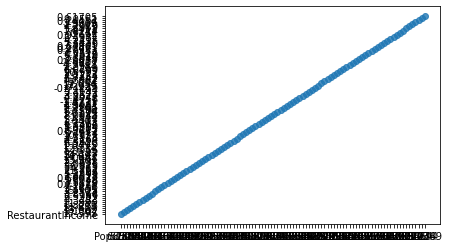

In [7]:
plot = sns.regplot(data=rest_df,
                   x="Population",
                   y="Profit")
sns.set(rc={'figure.figsize':(10,5)})
plot.set_title('Profit by population distribution', fontsize=14)
plt.show()

**Задание 3.** Реализуйте функцию потерь MSE для набора данных restaurants.csv.

In [9]:
def calculate_mse(y_pred, y_real):
    squared_error = (y_pred - y_real) ** 2
    sum_squared_error = np.sum(squared_error)
    ratio = sum_squared_error / y_real.size
    return ratio

**Задание 4.** Реализуйте  функцию  градиентного  спуска  для  выбора  параметров модели.  Постройте  полученную  модель  (функцию)  совместно  с графиком из пункта 2.

In [10]:
def  descent_grad(X, y, coeff, learning_rate=0.01, epochs=1000):
    '''
    Executes the process of gradient descent.
            Parameters:
                    X (np.matrix): matrix of parametres
                    b (np.array): vector of features
                    coeff (tuple): tuple of coefficients
                    learning_rate (float): learning rate coefficient
                    epochs (int64): number of epochs 
            Returns:
                    coeff: coefficients after gradient descent
                    mse_story: mses throughout the iterations
                    coeff_story: coefficients throughout the iterations
    '''
    m = y.shape[0]
    coeff_story = []
    mse_story = []
    for step in range(epochs):
        y_pred = np.dot(X, coeff)
        coeff_story.append(tuple(coeff))
        mse_story.append(calculate_mse(y_pred, y))
        coeff -= learning_rate * (2 / m) * (X.T.dot(y_pred - y))
    return coeff, mse_story, coeff_story

In [11]:
# labels preparation
X=rest_df["Population"].values
y=rest_df['Profit'].values
X_b = np.c_[np.ones((len(X), 1)), X]

# gradient descending
(intercept, slope), mse_story, coeff_story = descent_grad(X_b, y, (1, 1))
print(intercept, slope)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [4]:
# plotting
with plt.style.context('fivethirtyeight'):
    plt.scatter(X, y)
    plt.plot(X, slope * X + intercept, '-r')
    plt.show()

NameError: name 'X' is not defined

**Задание 5.*** Постройте  трехмерный  график  зависимости  функции  потерь  от параметров  модели  ($θ_0$ и  $θ_1$)  как  в  виде  поверхности,  так  и  в  виде изолиний (contour plot).

In [18]:
def compute_z(X, y, coeff):
    y_pred = np.dot(X,coeff)
    return calculate_mse(y_pred, y)

#let's check agai for the slope and intercept found

In [19]:
# x and y-axis values assigment
theta0_vals = np.linspace(-10,10,200)
theta1_vals = np.linspace(-10,10,200)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# z-axis values assigment
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        J_vals[i][j] = compute_z(X_b, y,
                                 (theta0_vals[i], theta0_vals[j]))

In [20]:
# plotting the surfaceplot
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Loss function distribution', scene = dict(
                    xaxis_title='θ0',
                    yaxis_title='θ1',
                    zaxis_title='MSE'))
fig.show()

In [21]:
fig = go.Figure(data =
    go.Contour(x=theta0_vals, y=theta1_vals, z=J_vals))
fig.show()

**Задание 6.** Загрузите набор данных houses.csv из текстового файла.

In [22]:
houses_df = pd.read_csv('houses.csv',
                      names=['Square', 'Rooms', 'Cost'],
                      header=None)
houses_df.head()

Square  Rooms    Cost
0    2104      3  399900
1    1600      3  329900
2    2400      3  369000
3    1416      2  232000
4    3000      4  539900

**Задание 7.** Произведите  нормализацию  признаков.  Повлияло  ли  это  на  скорость сходимости градиентного спуска? Ответ дайте в виде графика.

In [23]:
# values normalization
houses_norm_df = houses_df.copy()
houses_norm_df["Square"] = MinMaxScaler().fit_transform(houses_norm_df["Square"].values.reshape(-1,1))
houses_norm_df["Cost"] = MinMaxScaler().fit_transform(houses_norm_df["Cost"].values.reshape(-1,1))

For we are mathematicians, we can perform the comparison as accurately as calculation mistakes can allow us.
By that I mean starting the regression from the same point in transformed and initial coordinates, which we will retrieve from both datasets constructing the surface from 3 points: `0`, `1` and `3` rows values using this formula:
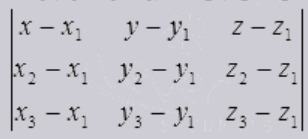


First surface coefficients are:

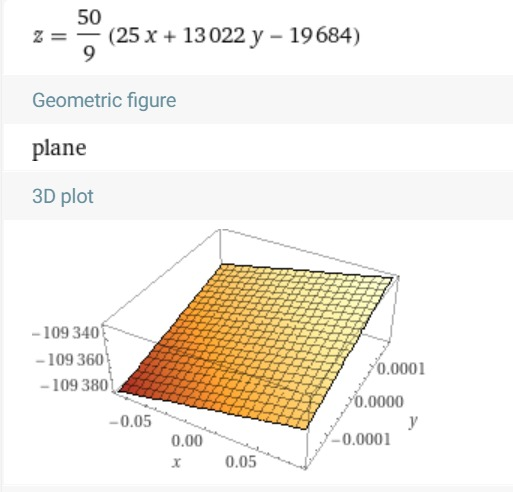

But, nevertheless, the following gradient descent diverges, for 

In [74]:
X=houses_df[["Square", "Rooms"]].values
y=houses_df['Cost'].values
X_b = np.c_[np.ones((len(X), 1)), X]

# gradient descending for unnormalized
(Q0, Q1, Q2), mse_story, coeff_story = descent_grad(X_b, y, (109355.56, -72344.44, 138.89), epochs=1000, learning_rate=0.00000001)
mse_story

[2.426301631577327e+16,
 1.9985615702470804e+16,
 1.6462291129192024e+16,
 1.3560104223887012e+16,
 1.116955272681452e+16,
 9200438866604704.0,
 7578466112945663.0,
 6242435898150479.0,
 5141938537255304.0,
 4235451222877525.0,
 3488771330379258.0,
 2873725920456539.0,
 2367108747465126.5,
 1949804665800552.5,
 1606068397356163.0,
 1322930447272451.5,
 1089707752616429.6,
 897600600302391.0,
 739360605585579.8,
 609017223642966.8,
 501652475264136.44,
 413215386839311.06,
 340369143289575.1,
 280365186874634.5,
 230939511506928.25,
 190227239658373.3,
 156692258765555.38,
 129069262248312.55,
 106316008294467.75,
 87573995089455.89,
 72136068730026.81,
 59419741637938.914,
 48945214752130.33,
 40317274255868.98,
 33210379785256.99,
 27356381483077.703,
 22534402450797.402,
 18562504854056.266,
 15290825235918.428,
 12595920026750.406,
 10376107901461.818,
 8547633246837.412,
 7041505982950.234,
 5800898502125.861,
 4779001509500.193,
 3937257864004.978,
 3243907780929.2246,
 2672790505

Note: I didn't get rid of ketchup on purpose to show that it may even occur that dull manually written gradient descent applied to unscaled values may even diverge

In [75]:
X_norm=houses_norm_df[["Square", "Rooms"]].values
y_norm=houses_norm_df['Cost'].values
X_b_norm = np.c_[np.ones((len(X_norm), 1)), X_norm]
# gradient descending for normalized
(Q0_n, Q1_n, Q2_n), mse_story_n, coeff_story_n = descent_grad(X_b_norm, y_norm, (1, 1, 1), epochs=1000, learning_rate=0.00000001)

iteratios = np.arange(1, 101, 1)

mse_story_n
#a = plt.plot(iteratios, mse_story, linewidth=5)
#b = plt.plot(iteratios, mse_story_n,'r')
#plt.show()

[17.9586772778101,
 17.958668902404753,
 17.958660527003317,
 17.958652151605804,
 17.958643776212195,
 17.958635400822498,
 17.95862702543672,
 17.958618650054856,
 17.9586102746769,
 17.95860189930286,
 17.958593523932738,
 17.958585148566524,
 17.958576773204225,
 17.958568397845838,
 17.958560022491366,
 17.958551647140805,
 17.95854327179416,
 17.95853489645142,
 17.9585265211126,
 17.958518145777695,
 17.958509770446703,
 17.95850139511962,
 17.958493019796457,
 17.9584846444772,
 17.958476269161856,
 17.958467893850425,
 17.958459518542913,
 17.95845114323931,
 17.958442767939623,
 17.958434392643845,
 17.958426017351982,
 17.95841764206404,
 17.95840926678,
 17.958400891499878,
 17.958392516223668,
 17.958384140951377,
 17.95837576568299,
 17.95836739041852,
 17.958359015157964,
 17.95835063990132,
 17.958342264648586,
 17.95833388939977,
 17.958325514154865,
 17.958317138913877,
 17.958308763676794,
 17.958300388443632,
 17.958292013214383,
 17.958283637989044,
 17.95827526276

**Задание 8.** Реализуйте  функции  потерь  MSE  и  градиентного  спуска  для  случая многомерной линейной регрессии с использованием векторизации.

It appeared that I've already done it. Particualrly for I had incorrectly interpreted the **Task 4**, and mostly in order to play manually with the params.

In [48]:
# here it comes (again)
def  descent_grad(X, y, coeff, learning_rate=0.01, epochs=1000):
    '''
    Executes the process of gradient descent.
            Parameters:
                    X (np.matrix): matrix of parametres
                    b (np.array): vector of features
                    coeff (tuple): tuple of coefficients
                    learning_rate (float): learning rate coefficient
                    epochs (int64): number of epochs 
            Returns:
                    coeff: coefficients after gradient descent
                    mse_story: mses throughout the iterations
                    coeff_story: coefficients throughout the iterations
    '''
    m = y.shape[0]
    coeff_story = []
    mse_story = []
    for step in range(epochs):
        y_pred = np.dot(X, coeff)
        coeff_story.append(tuple(coeff))
        mse_story.append(calculate_mse(y_pred, y))
        #vectorization uin one line:)
        coeff -= learning_rate * (2 / m) * (X.T.dot(y_pred - y))
    return coeff, mse_story, coeff_story

**Задание 9.** Покажите, что векторизация дает прирост производительности.

To depict impovments as clearly as it could be, let's manually rewrite all the used vectorizations:

In [60]:
array_1 = np.arange(100)
array_2 = np.arange(100)

#### Dot Product:

In [59]:
def dull_dot(array_1, array_2):
    dot = 0
    for i in range(len(array_1)):
        dot += array_1[i] * array_2[i]
    return dot

dull_t = timeit.timeit(lambda: dull_dot(array_1, array_2))
vect_t = timeit.timeit(lambda: array_1.dot(array_2))
print(f'dull: {dull_t}')
print(f'vectorized: {vect_t}')

dull: 26.851208099999894
vectorized: 0.9201398000000154


#### Multiplication by scalar:

In [61]:
def dull_multiply(array_1, scalar):
    for i in range(len(array_1)):
        array_1[i] * i
    return array_1

dull_t = timeit.timeit(lambda: dull_multiply(array_1, 10))
vect_t = timeit.timeit(lambda: array_1*10)
print(f'dull: {dull_t}')
print(f'vectorized: {vect_t}')

dull: 22.907240499999943
vectorized: 0.7339938000000075


Division will show even worse results. But the pucture is rather claer ***vectorization gives us approximately 25-times boost***

**Задание 10.** Попробуйте  изменить  параметр  $\eta$ (learning rate).  Как  при этом  изменяется  график  функции  потерь  в  зависимости  от  числа итераций градиентного спуск? Результат изобразите вкачестве графика.

**Задание 11.** Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.